In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import pandas as pd
import numpy as np 

In [3]:
SMB = []
HML = []
RMW = []
CMA = []
Mkt_RF = []

AllStocksFactors = []
StockName = []

In [4]:
ExcelFileName= 'cs89_results_export.xlsx'
workbook = xlrd.open_workbook(ExcelFileName)
worksheet = workbook.sheet_by_name("Sheet1") # We need to read the data  
# worksheet.nrows

for i in range (1, 50): #I made this # 6 to do some testing 
    StockName.append(worksheet.cell_value(i,0))
    StockFactor = []
    if worksheet.cell_value(i,1) <= .05:
        StockFactor.append(worksheet.cell_value(i,1))
    else:
        StockFactor.append(0)
    if worksheet.cell_value(i,2) <= .05:
        StockFactor.append(worksheet.cell_value(i,2))
    else:
        StockFactor.append(0)  
    if worksheet.cell_value(i,3) <= .05:
        StockFactor.append(worksheet.cell_value(i,3))
    else:
        StockFactor.append(0)
    if worksheet.cell_value(i,4) <= .05:
        StockFactor.append(worksheet.cell_value(i,4))
    else:
        StockFactor.append(0)
    if worksheet.cell_value(i,5) <= .05:
        StockFactor.append(worksheet.cell_value(i,5))
    else:
        StockFactor.append(0)
    
    AllStocksFactors.append(StockFactor)
    

In [5]:
# print (AllStockFactors)

In [6]:
# print (StockName)

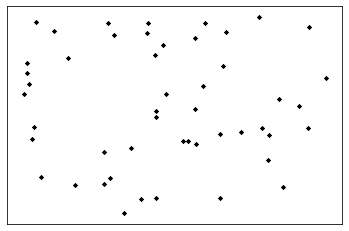

In [7]:
#Creating Graph for all of the edges to be placed on 

GTotal=nx.MultiDiGraph() #we need a MultiDiGraph so it can hold multiple edges 

for stock in StockName:
    GTotal.add_node(stock)

posTotal = nx.random_layout(GTotal)

for g in GTotal:
    nx.draw_networkx_nodes(GTotal, posTotal, node_size=5, node_color='k', alpha=0.5)
    
plt.show()

In [ ]:
#Adding Edges Between Stocks which are both statistically significant for ALL factors. 
ticker=0
for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
            
            #SMB - blue 
            if AllStocksFactors[index_stock][0] == AllStocksFactors[index_stock2][0]: 
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, posTotal, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'b')
            
            #HML - green
            if AllStocksFactors[index_stock][1] == AllStocksFactors[index_stock2][1]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, posTotal, edge_list= [stock, stock2], width=4, alpha = 0.5, edge_color= 'g')
             
            #RMW - red 
            if AllStocksFactors[index_stock][2] == AllStocksFactors[index_stock2][2]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, posTotal, edge_list= [stock, stock2], width=2, alpha = 0.5, edge_color= 'r')
            
            #CMA - magenta
            if AllStocksFactors[index_stock][3] == AllStocksFactors[index_stock2][3]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, posTotal, edge_list= [stock, stock2], width=1, alpha = 0.5, edge_color= 'm')
            
            #Mkt_RF - cyan
            if AllStocksFactors[index_stock][4] == AllStocksFactors[index_stock2][4]:
                ticker=0
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, posTotal, edge_list= [stock, stock2], width=0.5, alpha = 0.5, edge_color= 'c')
plt.show()

In [ ]:
#New Graph for SMB significance
GSMB=nx.Graph()
ticker=0 

for stock in StockName:
    GSMB.add_node(stock) # add nodes 
posSMB = nx.random_layout(GSMB)

#Adding Edges Between Stocks which are both statistically significant for SMB 
for stock in StockName:
    index_stock= StockName.index(stock) 
    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        
        if stock != stock2:   
            if AllStocksFactors[index_stock][0] == AllStocksFactors[index_stock2][0]: 
                   ticker = 1
            else:
                GTotal.add_edge(stock, stock2)
                nx.draw_networkx_edges(GTotal, posTotal, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'b')

plt.show() # graph with edges 

In [ ]:
#New Graph for HML significance
GHML=nx.Graph()
ticker=0 

for stock in StockName:
    GHML.add_node(stock) # add nodes 
posHML = nx.random_layout(GHML)

nx.draw_networkx_nodes(GHML, posHML, node_size=5, node_color='k', alpha=0.5) #draw nodes 

plt.show() # graph with no edges 

#Adding Edges Between Stocks which are both statistically significant for HML
for stock in StockName:
    index_stock= StockName.index(stock)
    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
            
            #HML
            if AllStocksFactors[index_stock][1] == AllStocksFactors[index_stock2][1]:
                ticker=1
            else:
                GHML.add_edge(stock, stock2)
                nx.draw_networkx_edges(GHML, posHML, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'g')

In [ ]:
#New Graph for RMW significance
GRMW=nx.Graph() 
ticker=0

for stock in StockName:
    GRMW.add_node(stock) # add nodes 
posRMW = nx.random_layout(GRMW)

nx.draw_networkx_nodes(GRMW, posRMW, node_size=5, node_color='k', alpha=0.5) #draw nodes 

plt.show() # graph with no edges 

#Adding Edges Between Stocks which are both statistically significant for RMW

for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
              #RMW
            if AllStocksFactors[index_stock][2] == AllStocksFactors[index_stock2][2]:
                ticker=1 
            else:
                GRMW.add_edge(stock, stock2)
                nx.draw_networkx_edges(GRMW, posRMW, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'r')
            

In [ ]:
#New Graph for CMA significance
GCMA=nx.Graph()
ticker=0

for stock in StockName:
    GCMA.add_node(stock) # add nodes 
posCMA = nx.random_layout(GCMA)

nx.draw_networkx_nodes(GCMA, posCMA, node_size=5, node_color='k', alpha=0.5) #draw nodes 

plt.show() # graph with no edges 


#Adding Edges Between Stocks which are both statistically significant for CMA

for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
             #CMA
            if AllStocksFactors[index_stock][3] == AllStocksFactors[index_stock2][3]:
                ticker=1
            else:
                GCMA.add_edge(stock, stock2)
                nx.draw_networkx_edges(GCMA, posCMA, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'm')
            

In [ ]:
#New Graph for Mkt_RF significance
GMkt_RF=nx.Graph()
ticker=0

for stock in StockName:
    GMkt_RF.add_node(stock) # add nodes 
posMkt_RF = nx.random_layout(GMkt_RF)

nx.draw_networkx_nodes(GMkt_RF, posMkt_RF, node_size=5, node_color='k', alpha=0.5) #draw nodes 

plt.show() # graph with no edges 


#Adding Edges Between Stocks which are both statistically significant for Mkt_RF

for stock in StockName:
    index_stock= StockName.index(stock)

    for stock2 in StockName:
        index_stock2= StockName.index(stock2)
        if stock != stock2:
               #Mkt_RF
            if AllStocksFactors[index_stock][4] == AllStocksFactors[index_stock2][4]:
                ticker=1
            else:
                GMkt_RF.add_edge(stock, stock2)
                nx.draw_networkx_edges(GMkt_RF, posMkt_RF, edge_list= [stock, stock2], width=6, alpha = 0.5, edge_color= 'c')